# Project

1. EDA - Разверточный анализ данных
    * preprocessing
    * eda
        * fgh 
    * выбросы 
    * 

In [174]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from matplotlib import rcParams
import matplotlib as mpl
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 15,8

from scipy.stats import ttest_ind

In [238]:
train = pd.read_csv('../data_frames/TITANIC/train.csv')
test = pd.read_csv('../data_frames/TITANIC/test.csv')

In [239]:
passId = test['PassengerId']

In [176]:
train.shape

(891, 12)

In [177]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**EDA**
1. 

In [178]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Визуализация

In [179]:
numeric_columns = train.columns[train.dtypes != 'object']
object_columns = train.columns[train.dtypes == 'object']

In [180]:
df_num = train[numeric_columns].drop('PassengerId', axis=1)
df_obj = train[object_columns]

In [181]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

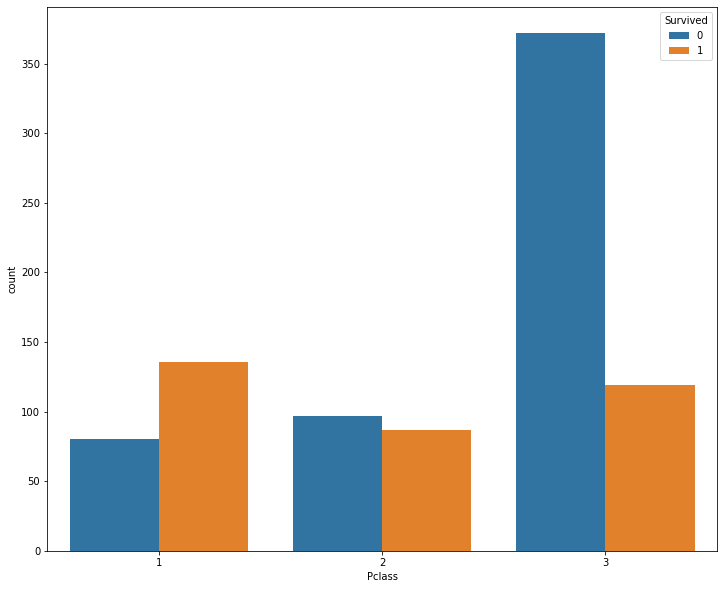

In [182]:
fig, ax = plt.subplots(figsize=(12,10))
sns.countplot(x='Pclass', hue='Survived', data=train)

[None, None, None, None, None, None, None, None, None, None, None, None]

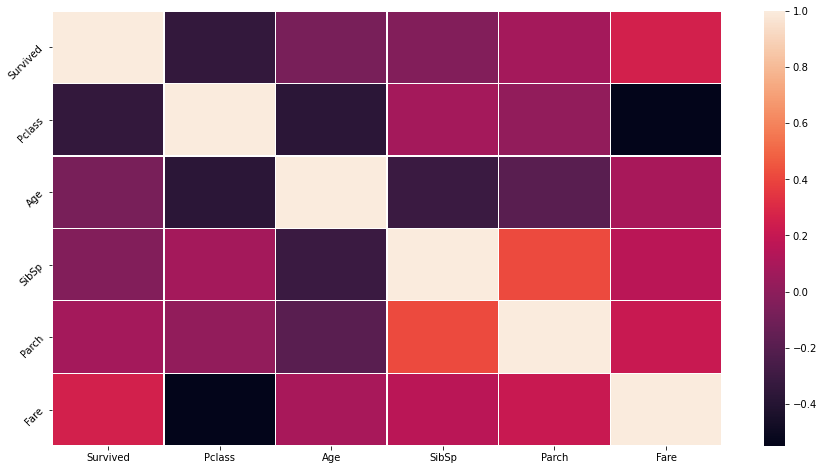

In [183]:
ax = sns.heatmap(df_num.corr(), linewidths=.3);
locs, labels = plt.yticks()
plt.setp(labels, rotation=45)

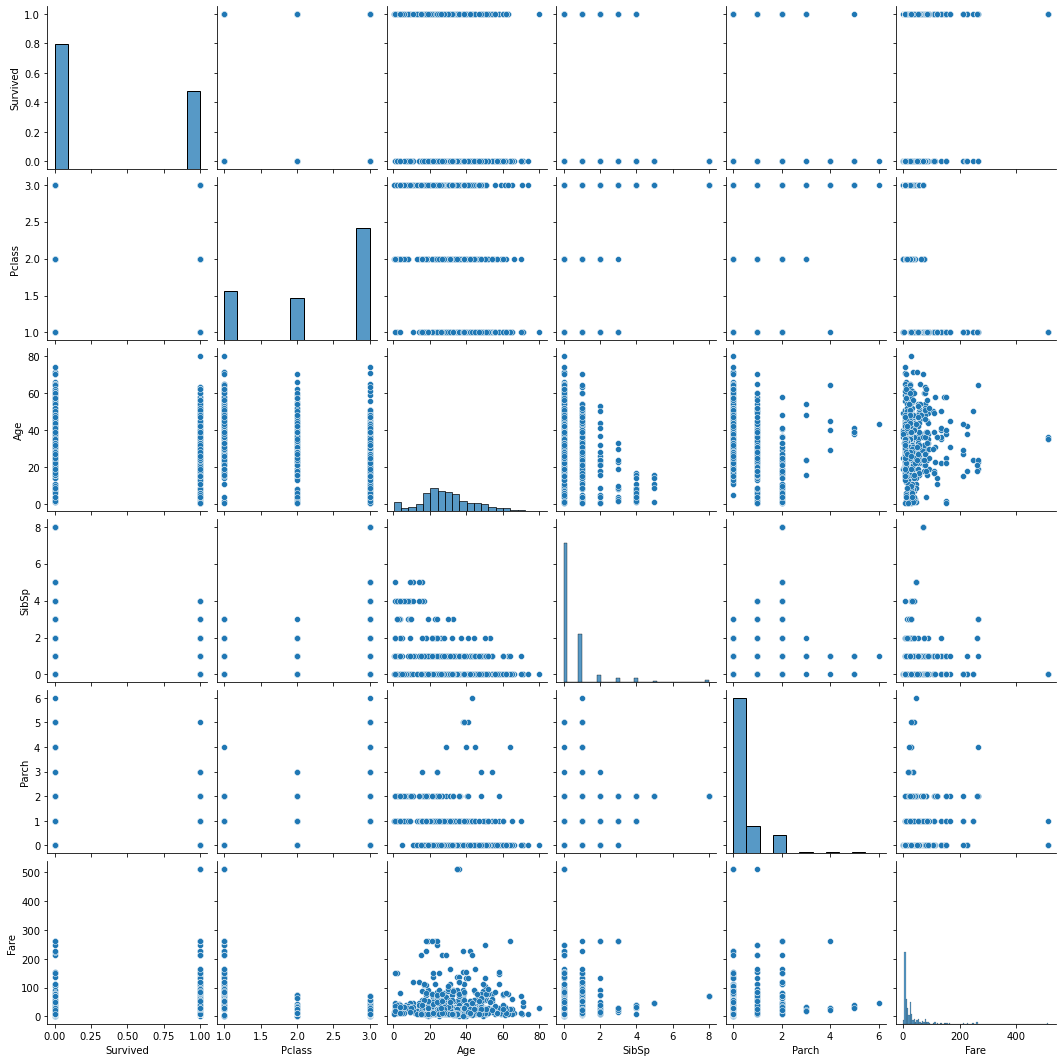

In [184]:
sns.pairplot(df_num);

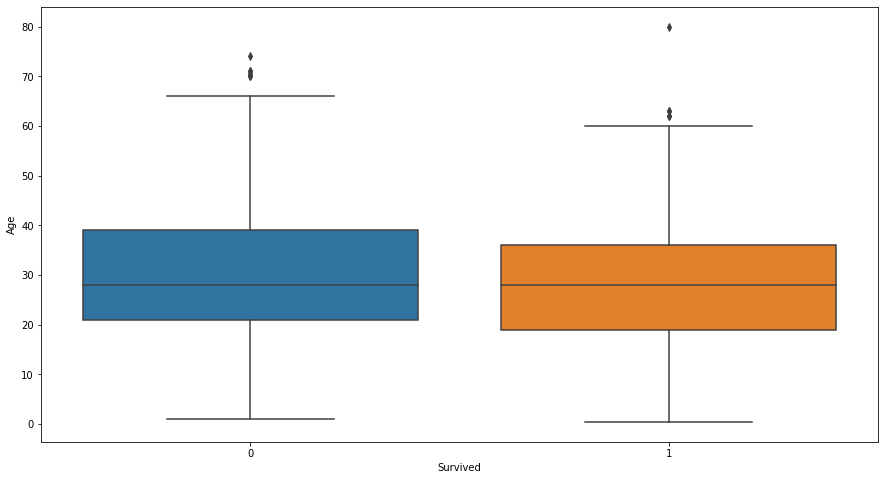

In [185]:
sns.boxplot(data=train, x='Survived', y='Age');

In [186]:
train_viz = train.copy()
train_viz.Survived = train.Survived.map({1:'Survived', 0:"Didn't survived"})

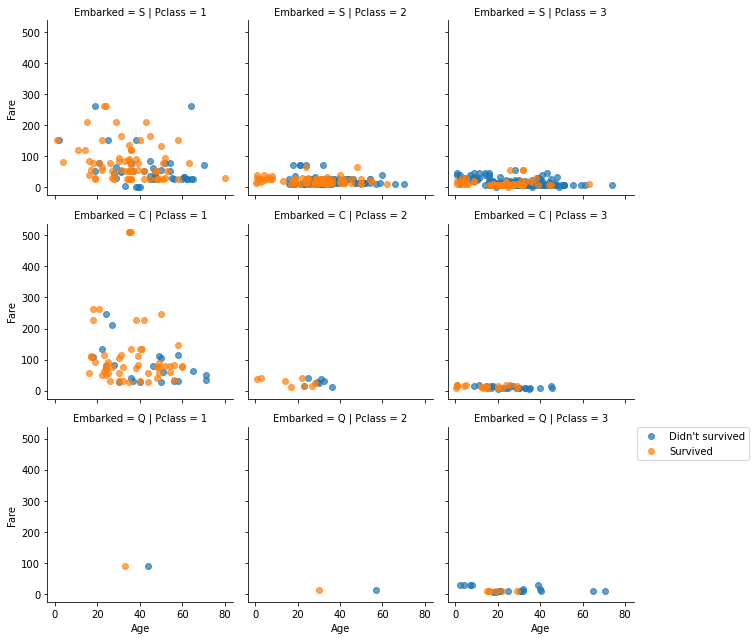

In [187]:
ax = sns.FacetGrid(data=train_viz, col='Pclass', row='Embarked', hue='Survived');
ax.map(plt.scatter, 'Age', 'Fare', alpha=0.7);
plt.legend(loc='best');
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

In [188]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [189]:
train['is_child'] = train.Age < 10
train['is_child'] = train['is_child'].map({False:0, True:1})
test['is_child'] = test.Age < 10
test['is_child'] = test['is_child'].map({False:0, True:1})

In [190]:
round(train.isna().sum()/train.shape[0] * 100, 2).sort_values(ascending=False)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
is_child        0.00
dtype: float64

In [191]:
train['NameLength'] = train['Name'].apply(lambda x: len(x))
test['NameLength'] = test['Name'].apply(lambda x: len(x))

<AxesSubplot:xlabel='Survived', ylabel='NameLength'>

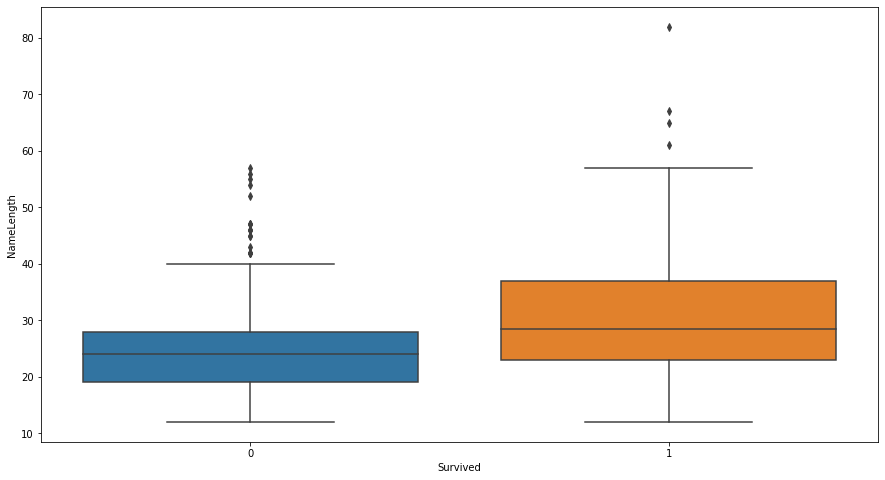

In [192]:
sns.boxplot(data=train, x='Survived', y='NameLength')

In [193]:
a = train[train['Survived'] == 0]['NameLength'].values
b = train[train['Survived'] == 1]['NameLength'].values

In [194]:
ttest_ind(a, b)

Ttest_indResult(statistic=-10.506602212381356, pvalue=2.026795066343707e-24)

In [197]:
train.drop(['Ticket', 'Name', 'Cabin', 'PassengerId'], axis=1, inplace=True)
test.drop(['Ticket', 'Name', 'Cabin', 'PassengerId'], axis=1, inplace=True)

In [198]:
train["Age"] = train["Age"].fillna(train["Age"].median())
test["Age"] = test["Age"].fillna(test["Age"].median())

In [199]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

In [200]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_child,NameLength
0,0,3,male,22.0,1,0,7.2500,S,0,23
1,1,1,female,38.0,1,0,71.2833,C,0,51
2,1,3,female,26.0,0,0,7.9250,S,0,22
3,1,1,female,35.0,1,0,53.1000,S,0,44
4,0,3,male,35.0,0,0,8.0500,S,0,24


In [236]:
test.Fare = test.Fare.fillna(test.Fare.median())

In [202]:
X_train, y_train = train.drop(['Survived'], axis=1), train['Survived']

In [203]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_child,NameLength
0,3,male,22.0,1,0,7.2500,S,0,23
1,1,female,38.0,1,0,71.2833,C,0,51
2,3,female,26.0,0,0,7.9250,S,0,22
3,1,female,35.0,1,0,53.1000,S,0,44
4,3,male,35.0,0,0,8.0500,S,0,24
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0,21
887,1,female,19.0,0,0,30.0000,S,0,28
888,3,female,28.0,1,2,23.4500,S,0,40
889,1,male,26.0,0,0,30.0000,C,0,21


# OHE (dummies)


In [204]:
X_dummies = X_train.copy()

In [205]:
cat_features = X_train.columns
cat_features = cat_features.drop(['Age', 'Fare', 'NameLength'])

In [206]:
X_dummies[cat_features] = X_dummies[cat_features].astype('object')
test[cat_features] = test[cat_features].astype('object')

In [207]:
X_dummies.dtypes

Pclass         object
Sex            object
Age           float64
SibSp          object
Parch          object
Fare          float64
Embarked       object
is_child       object
NameLength      int64
dtype: object

In [208]:
X_dummies = pd.get_dummies(X_dummies, columns=X_dummies.columns[X_dummies.dtypes == 'object'])
test = pd.get_dummies(test, columns=test.columns[test.dtypes == 'object'])

In [209]:
X_dummies.head()

,Age,Fare,NameLength,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,is_child_0,is_child_1
0,22.0,7.2500,23,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
1,38.0,71.2833,51,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,26.0,7.9250,22,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,35.0,53.1000,44,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
4,35.0,8.0500,24,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,1,0


In [210]:
test.head()

,Age,Fare,NameLength,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S,is_child_0,is_child_1
0,34.5,7.8292,16,0,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
1,47.0,7.0000,32,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,62.0,9.6875,25,0,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
3,27.0,8.6625,16,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,1,0
4,22.0,12.2875,44,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [211]:
test.drop('Parch_9', axis=1, inplace=True)

In [212]:
X_train_split, X_valid, y_train_split, y_valid = train_test_split(X_dummies, y_train, test_size=0.3)

In [213]:
skf = StratifiedKFold(n_splits=5, shuffle=True)

In [214]:
rf = RandomForestClassifier(random_state=17)

In [215]:
forest_params = {'n_estimators':range(200, 400, 50),
                 'max_depth':range(10, 15),
                 'min_samples_split':range(2, 5, 2),
                 'min_samples_leaf':range(2, 4)}

In [216]:
clf = GridSearchCV(rf, forest_params, cv=skf, n_jobs=-1, scoring='accuracy')
clf.fit(X_train_split, y_train_split)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': range(10, 15),
                         'min_samples_leaf': range(2, 4),
                         'min_samples_split': range(2, 5, 2),
                         'n_estimators': range(200, 400, 50)},
             scoring='accuracy')

In [217]:
clf.best_params_

{'max_depth': 11,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 350}

In [218]:
best_rf = clf.best_estimator_

In [219]:
y_pred = best_rf.predict(X_valid)

In [220]:
accuracy_score(y_valid, y_pred)

0.7873134328358209

In [221]:
pd.DataFrame(best_rf.feature_importances_, index=X_train_split.columns) \
    .rename(columns={0:'importance'}) \
    .sort_values('importance', ascending=False)

,importance
Sex_female,0.183458
Sex_male,0.174907
Fare,0.146337
NameLength,0.108788
Age,0.101123
Pclass_3,0.075334
Pclass_1,0.042383
Pclass_2,0.019039
is_child_0,0.018025
is_child_1,0.017938


In [227]:
X_dummies.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [228]:
best_rf.fit(X_dummies, y_train)

RandomForestClassifier(max_depth=11, min_samples_leaf=2, n_estimators=350,
                       random_state=17)

In [237]:
y_package = best_rf.predict(test)

In [245]:
output = pd.DataFrame({'PassengerId': passId, 'Survived': y_package.astype(int)})

In [247]:
output.to_csv('submission.csv', index=False)

**CatBoost**

In [152]:
ctb = CatBoostClassifier(iterations=500, thread_count=3, max_depth = 6,
                         bagging_temperature = 1, learning_rate = 0.03, random_strength=2, random_seed=17)

In [153]:
X_train[cat_features] = X_train[cat_features].astype('object')

In [154]:
X_train_ctb, X_valid_ctb, y_train_ctb, y_valid_ctb = train_test_split(X_train, y_train, test_size=0.3, random_state=17)

In [155]:
cat_features_idx = np.where(X_train.dtypes == "object")[0].tolist()

In [156]:
ctb.fit(X_train_ctb, y_train_ctb, cat_features=cat_features_idx);

0:	learn: 0.6792246	total: 7.36ms	remaining: 3.67s
1:	learn: 0.6672228	total: 20.8ms	remaining: 5.17s
2:	learn: 0.6511450	total: 26ms	remaining: 4.3s
3:	learn: 0.6344653	total: 35.9ms	remaining: 4.45s
4:	learn: 0.6181810	total: 45.6ms	remaining: 4.51s
5:	learn: 0.6088780	total: 50.2ms	remaining: 4.14s
6:	learn: 0.5956358	total: 59.5ms	remaining: 4.19s
7:	learn: 0.5836565	total: 65.7ms	remaining: 4.04s
8:	learn: 0.5766041	total: 68.9ms	remaining: 3.76s
9:	learn: 0.5661475	total: 77.9ms	remaining: 3.82s
10:	learn: 0.5543149	total: 87.5ms	remaining: 3.89s
11:	learn: 0.5484982	total: 92.1ms	remaining: 3.75s
12:	learn: 0.5462273	total: 95.3ms	remaining: 3.57s
13:	learn: 0.5362769	total: 104ms	remaining: 3.62s
14:	learn: 0.5303287	total: 110ms	remaining: 3.56s
15:	learn: 0.5221433	total: 119ms	remaining: 3.61s
16:	learn: 0.5145663	total: 125ms	remaining: 3.56s
17:	learn: 0.5092287	total: 130ms	remaining: 3.47s
18:	learn: 0.5027373	total: 136ms	remaining: 3.43s
19:	learn: 0.4955448	total: 145

162:	learn: 0.3360032	total: 1.35s	remaining: 2.8s
163:	learn: 0.3358484	total: 1.36s	remaining: 2.79s
164:	learn: 0.3355162	total: 1.37s	remaining: 2.78s
165:	learn: 0.3351847	total: 1.38s	remaining: 2.77s
166:	learn: 0.3346572	total: 1.39s	remaining: 2.76s
167:	learn: 0.3345240	total: 1.39s	remaining: 2.75s
168:	learn: 0.3344316	total: 1.4s	remaining: 2.74s
169:	learn: 0.3339299	total: 1.41s	remaining: 2.74s
170:	learn: 0.3334339	total: 1.42s	remaining: 2.73s
171:	learn: 0.3326629	total: 1.43s	remaining: 2.72s
172:	learn: 0.3323644	total: 1.44s	remaining: 2.72s
173:	learn: 0.3318263	total: 1.45s	remaining: 2.71s
174:	learn: 0.3313369	total: 1.46s	remaining: 2.7s
175:	learn: 0.3303837	total: 1.46s	remaining: 2.69s
176:	learn: 0.3301420	total: 1.47s	remaining: 2.69s
177:	learn: 0.3299981	total: 1.48s	remaining: 2.67s
178:	learn: 0.3293627	total: 1.49s	remaining: 2.67s
179:	learn: 0.3280020	total: 1.5s	remaining: 2.66s
180:	learn: 0.3278164	total: 1.5s	remaining: 2.65s
181:	learn: 0.326

331:	learn: 0.2667609	total: 2.92s	remaining: 1.48s
332:	learn: 0.2657680	total: 2.93s	remaining: 1.47s
333:	learn: 0.2650738	total: 2.94s	remaining: 1.46s
334:	learn: 0.2649053	total: 2.95s	remaining: 1.45s
335:	learn: 0.2647498	total: 2.96s	remaining: 1.45s
336:	learn: 0.2646113	total: 2.97s	remaining: 1.44s
337:	learn: 0.2639352	total: 2.98s	remaining: 1.43s
338:	learn: 0.2636730	total: 2.99s	remaining: 1.42s
339:	learn: 0.2635871	total: 3s	remaining: 1.41s
340:	learn: 0.2634821	total: 3.01s	remaining: 1.4s
341:	learn: 0.2630641	total: 3.02s	remaining: 1.4s
342:	learn: 0.2623457	total: 3.03s	remaining: 1.39s
343:	learn: 0.2613303	total: 3.04s	remaining: 1.38s
344:	learn: 0.2611504	total: 3.05s	remaining: 1.37s
345:	learn: 0.2607090	total: 3.06s	remaining: 1.36s
346:	learn: 0.2606591	total: 3.07s	remaining: 1.35s
347:	learn: 0.2605885	total: 3.08s	remaining: 1.34s
348:	learn: 0.2602724	total: 3.09s	remaining: 1.34s
349:	learn: 0.2597117	total: 3.1s	remaining: 1.33s
350:	learn: 0.2596

497:	learn: 0.2078769	total: 4.7s	remaining: 18.9ms
498:	learn: 0.2078026	total: 4.71s	remaining: 9.45ms
499:	learn: 0.2076277	total: 4.72s	remaining: 0us


In [159]:
y_pred_ctb = ctb.predict(X_valid_ctb)

In [160]:
accuracy_score(y_pred_ctb, y_valid_ctb)

0.7873134328358209